In [88]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 29 11:56:05 2022

@author: gowthamarumugam
"""

import pandas as pd
import numpy as np
import csv


x = np.loadtxt("wikipedia.dat",dtype="str")
indices = []
lookup = {}

for i in range(len(x)):
    if x[i][0] == "$":
        indices.append(i)

chunks = np.split(x,indices)
chunks = list(chunks)

chunks.pop(0)

for j in chunks:
    seg = list(j)
    for i in seg[1:]:
        lookup[i] = seg[0][1:]
d = {'mispellings': lookup.values(), 'actual word': lookup.keys()}
pd.DataFrame(d)
pd.DataFrame(d).to_csv(path_or_buf="mispellings.csv")

In [32]:
p = pd.DataFrame(lookup.keys(),index=lookup.values())

In [33]:
p.iloc[1]

0    Athenean
Name: Athenian, dtype: object

In [34]:
np.save('lookup.npy',lookup)

In [35]:
df = pd.read_csv ('pp_data.csv')
print(df)

             word        count
0             the  23135851162
1              of  13151942776
2             and  12997637966
3              to  12136980858
4               a   9081174698
...           ...          ...
70645   defoliate        12718
70646  insatiably        12717
70647      cestus        12716
70648     rasbora        12714
70649  inhibitive        12714

[70650 rows x 2 columns]


[4.38693049e-02 2.49382045e-02 2.46456177e-02 ... 2.41115867e-08
 2.41077944e-08 2.41077944e-08]


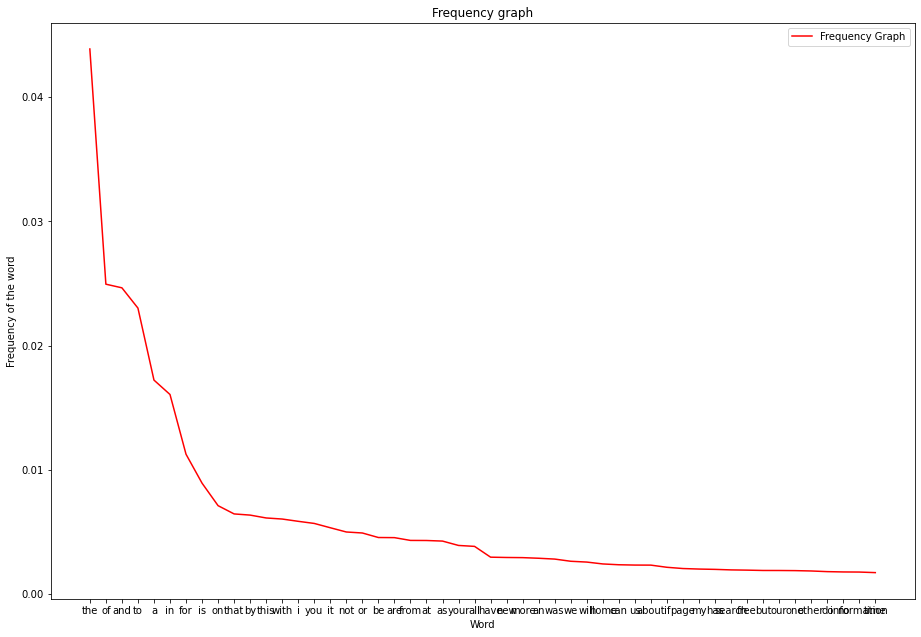

In [84]:
counts = df['count'].to_numpy()
counts_norm = counts/(np.sum(counts))
print(counts_norm)
xdata = np.arange(50,step=1)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
fig = plt.figure()
plt = fig.add_axes([0,0,2,2])
plt.plot(df['word'][:50], counts_norm[:50], color='red', label="Frequency Graph")
plt.set_title("Frequency graph")
plt.set_xlabel('Word')
plt.set_ylabel('Frequency of the word')
plt.legend()